# Predicting Median House Values

 ## Data set Attributes

 The data set contains information about houses in Boston, Massachusetts. The data set was collected by the U.S. Census Service and first published by Harrison and Rubenfeld in 1978.

 It contains the following variables:
* **crim:** per capita crime rate by town
* **zn:** proportion of residential land zoned for lots over 25,000 sq. ft
* **indus:** proportion of non-retail business acres per town
* **chas:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **nox:** nitric oxide concentration (parts per 10 million)
* **rm:** average number of rooms per dwelling
* **age:** proportion of owner-occupied units built prior to 1940
* **dis:** weighted distances to five boston employment centers
* **rad:** index of accessibility to radial highways
* **tax:** full-value property tax rate per \$10,000
* **ptratio:** pupil-teacher ratio by town
* **b:** 1000(bk — 0.63)², where bk is the proportion of [people of African American descent] by town
* **lstat:** percentage of lower status of the population
* **medv:** median value of owner-occupied homes in $1000s


*Harrison, David, and Daniel L. Rubinfeld, Hedonic Housing Prices and the Demand for Clean Air, Journal of Environmental Economics and Management, Volume 5, (1978), 81-102. Original data.*


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the median value based on the 'lm' and 'lstat` variables.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Read in the data set
df = pd.read_csv("boston.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Data Cleaning and Pre-processing

Preprocessing data allows us to gain insights into the data
and highlights problems such as missing or corrupted data.

In [3]:
# Clean and pre-process the data if neccessary
df.shape

(506, 14)

In [4]:
# Get the number of missing values from each column
missing_values_count = df.isnull().sum()
missing_values_count

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

## Exploratory Data Analysis

Exploratory data analysis helps to gain insights into the dataset by
visualising the distributions of the dependent variable and independent
variables and identifying any patterns or trends in the data.

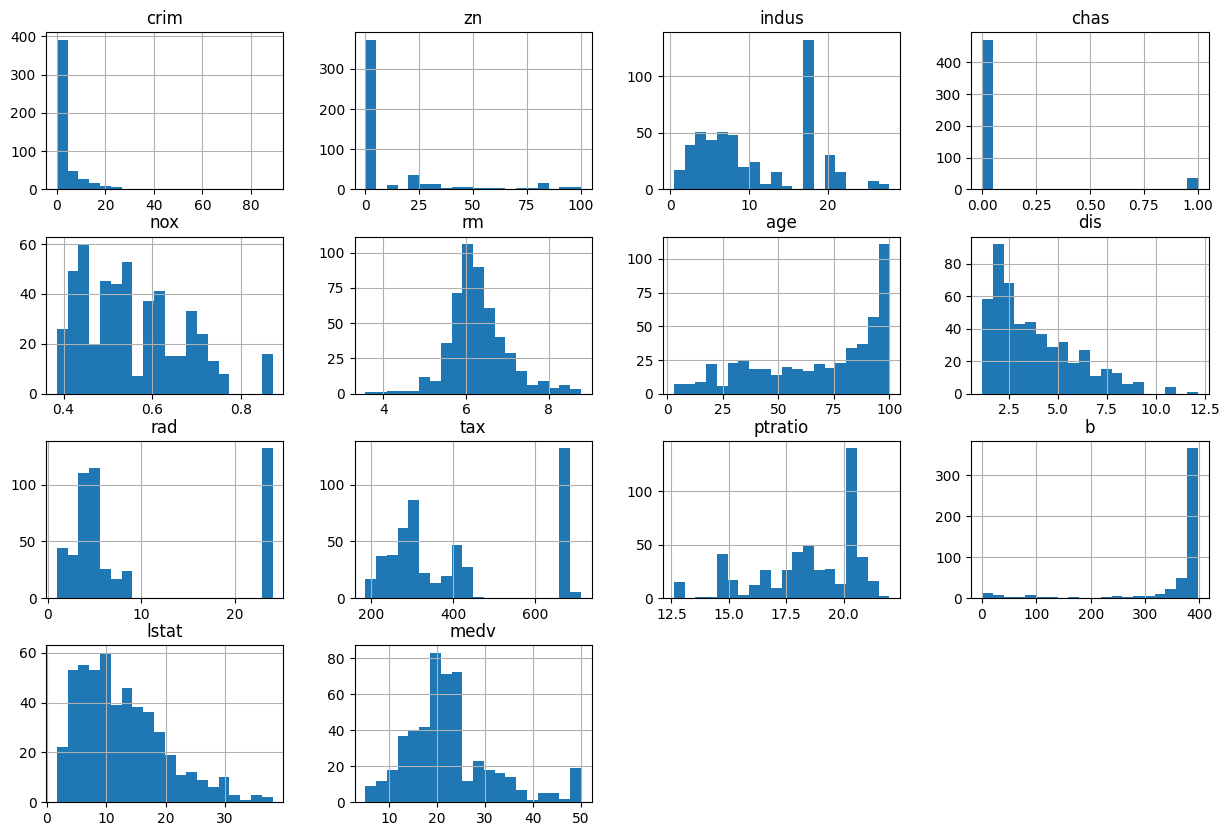

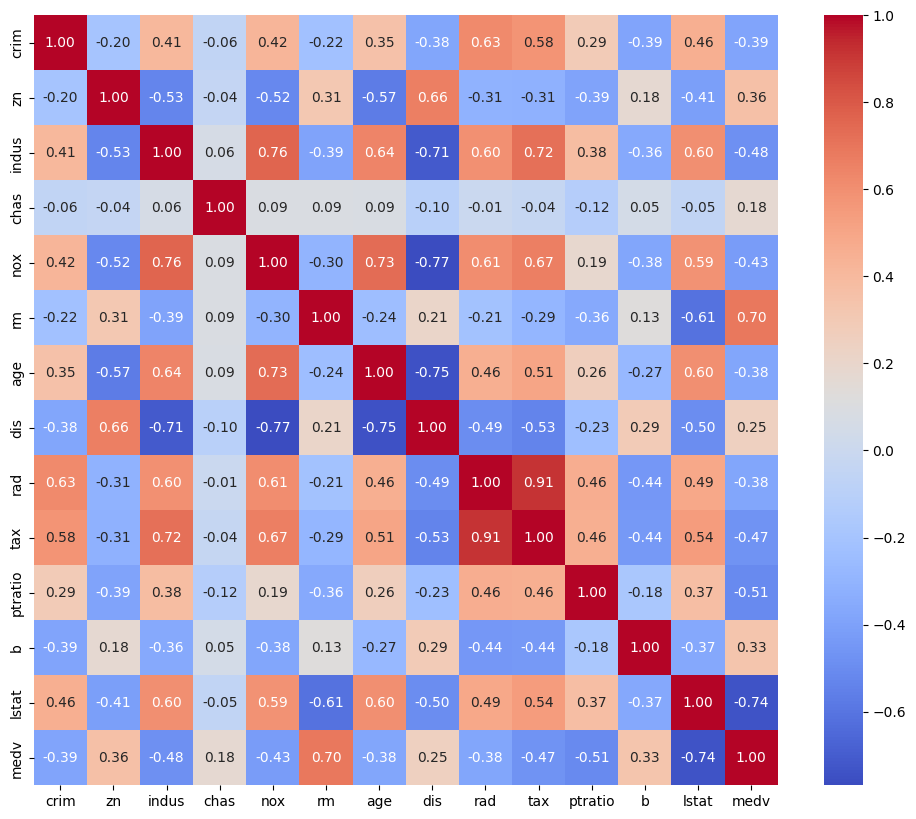

In [5]:
# Explore the data with visualisations such as histograms and correlation matrices

# Histograms
df.hist(bins=20, figsize=(15, 10))
plt.show()

# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

plt.show()

## Dependent and Independent Variables

In this section, the data will be split into dependent and independent variables. The dependent varibale is the median value (medv) and the independent variables are average number of rooms per dwelling (rm) and the proportion of the population with a low status (lstat). Over and above that, develop a multiple linear regression model and fit our data.

In [6]:
# Split the independent variables from the dependent variable
X = df.iloc[:,[5,12]].values # Independent variable
y = df.iloc[:,13].values
y = y.reshape(-1,1) # Dependent variable

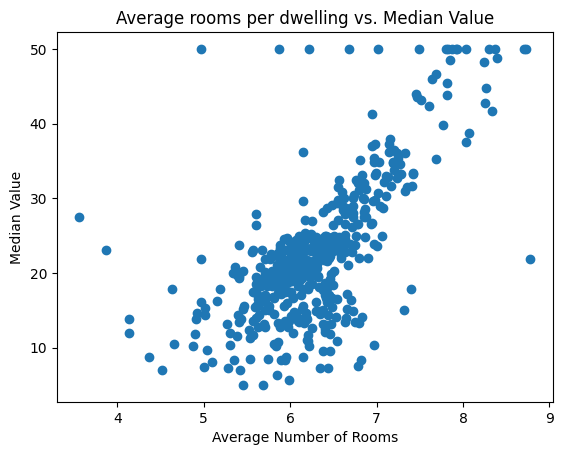

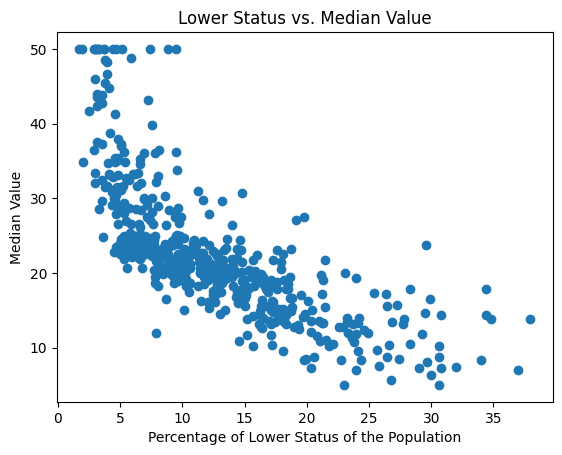

In [22]:
# Explore relationships between the independent and dependent variables
# Scatter plot for the first independent variable (X[:,0]) vs. the dependent variable (y)
plt.scatter(X[:, 0], y)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Value')
plt.title('Average rooms per dwelling vs. Median Value')
plt.show()

# Scatter plot for the second independent variable (X[:,1]) vs. the dependent variable (y)
plt.scatter(X[:, 1], y)
plt.xlabel('Percentage of Lower Status of the Population')
plt.ylabel('Median Value')
plt.title('Lower Status vs. Median Value')
plt.show()

In [8]:
# Create a training and test set with a 75:25 split ratio
rseed=23
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=rseed)

print("Training data:",X_train.shape, y_train.shape)
print("Test data:",X_test.shape, y_test.shape)

Training data: (379, 2) (379, 1)
Test data: (127, 2) (127, 1)


In [9]:
# Build a multiple linear regression model using 'rm' and 'lstat'
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [10]:
# Print the model intercept and coefficients
print('Intercept:\n', lm.intercept_)
print('Coefficients:\n', lm.coef_)

Intercept:
 [-1.61188066]
Coefficients:
 [[ 5.1521073  -0.64104542]]


In [11]:
# Generate predictions for the test set
y_pred = lm.predict(X_test)
y_pred[0:5]

array([[22.92283608],
       [26.09586861],
       [23.79496685],
       [18.24503287],
       [39.75785571]])

In [12]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):\n',mse.round(4))

rmse = np.sqrt(mse)
print('Root Mean Sqaured Error (RMSE)\n',rmse.round(4))

Mean Squared Error (MSE):
 30.2922
Root Mean Sqaured Error (RMSE)
 5.5038


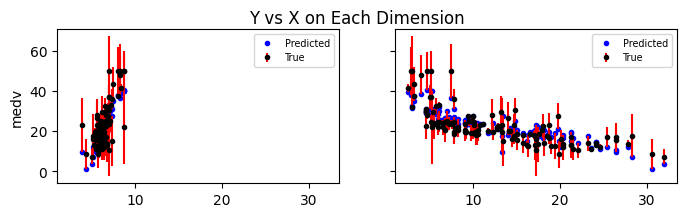

In [19]:
# Generate a plot
## Plot the errors
fig, ax = plt.subplots(1, X_test.shape[1], sharey=True, sharex=True, figsize=(8,2))
fig.suptitle("Y vs X on Each Dimension")
ax[0].set_ylabel(df.columns[13])

# Get values for the error bar
error_bar_values = np.abs((y_test-y_pred)[:,0])

# Plot data, predicted values, and error bars
for i in range(X_test.shape[1]):
    ax[i].errorbar(X_test[:, i], y_test[:, 0], yerr=error_bar_values, fmt='.k', ecolor='red', label='True')
    ax[i].scatter(X_test[:,i], y_pred[:,0], c='b', marker='.', label='Predicted')
    ax[i].legend(loc='best', fontsize='x-small')

In [14]:
# Print the coefficients
print('Coefficients:\n',model.coef_)

Coefficients:
 [[ 5.1521073  -0.64104542]]


**Interpret coefficients in the context of the prediction:**
A one-unit increase in rooms per dwelling is associated with an increase of 
5.1521073 in the predicted median house value.
A one-unit increase in the proportion of the population with a low status is associated with a decrease of 0.64104542 in the predicted median house value.

**Summarise findings**
- Data cleaning and processing:
The data did not contain any missing or corrupted values. 
- Exploratory data analysis: 
The histogram plot showed all the varibales included in the dataset. However our main focus is on the average number of rooms per dwelling (rm) and the percentage of lower status of the population (Istat) for independent variables and the median house value (medv) for the dependent variable. rm histogram followed a normal distribution, this is evident by the bell shaped area of the histogram. Istat was skewed to the right, with the higest number of the population sitting at 10%. The medv histogram was bell-shaped and displayed having a normal distribution. The correlation matrix shows that the relationship between the dependent and independent variables is strong. Relationship between medv and Istat was -0.74, this indicates a strong negative linear relationship between the two variables. As the proportion of the population with a low status increases, median value tends to decrease, and vice versa. The relationship between medv and rm have a correlation of 0.7, this indicates a strong positive linear relationship between two variables. As the number of rooms per dwelling increase, median value tends to increase as well.
- Model performance
Mean Squared Error (MSE): MSE is the average of the squared differences between predicted and actual values. An MSE of 30.2922 indicates that, on average, the squared difference between the predicted median values and the actual median values is 30.2922. Lower MSE values are generally better, as they indicate smaller prediction errors.

Root Mean Squared Error (RMSE): RMSE is the square root of the MSE. An RMSE of 5.5038 suggests that, on average, the model's predictions are off by approximately 5.5038 units in terms of median value. Like MSE, lower RMSE values are better, indicating smaller prediction errors.

The model seems to be providing predictions that are reasonably close to the actual values. The RMSE of 5.5038 suggests that the model's predictions, on average, are within about 5.5 units of the actual median values.

- Intercept and Coefficints
Intercept (-1.61188066): This is the value of the dependent variable (median value) when all independent variables are zero. In practical terms, it might not have a meaningful interpretation in this context, especially if having zero rooms or zero percentage of lower status is not possible or meaningful.

Coefficient for Rooms (5.1521073): This indicates how much the median value is expected to increase for each additional unit of the average number of rooms. As the average number of rooms per dwelling increases by one, the median value is expected to increase by approximately 5.15 units, when other variables are held constant.

Coefficient for LSTAT (-0.64104542): This indicates how much the median value is expected to decrease for each additional percentage point increase in the percentage of lower status of the population. As the percentage of lower status of the population increases by one percentage point, the median value is expected to decrease by approximately 0.64 units, when other variables are held constant.

The coefficients provide insights into the estimated impact of each independent variable on the dependent variable. Positive coefficients (like the one for rooms) suggest a positive relationship (an increase in rooms is associated with an increase in median value), while negative coefficients (like the one for LSTAT) suggest a negative relationship (an increase in the percentage of lower status is associated with a decrease in median value).